In [1]:
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess
import shlex
import numpy as np
import pandas as pd

In [2]:
def run_simulation_real_data (filein_idx, filein_data, model, ratio):
    
    
    

    command = '../Readfile/bt_model_data.out ' + filein_idx + ' ' + filein_data + ' ' + str(model) + ' ' + str(ratio) 
#     print(shlex.split(command))

    process = subprocess.Popen(shlex.split(command), stdout=subprocess.PIPE,stderr=subprocess.PIPE)

    
    ##parse output
    output = process.communicate()[0].decode("utf-8")
    G = {}
    G['idx'] = output.split()[0]
    G['data'] = output.split()[1]
    G['prior'] = float(output.split()[2])
    G['like_ho'] = float(output.split()[3])
    G['like_hol'] = float(output.split()[4])
    G['like_bin'] = float(output.split()[5])

    
    HO = {}
    HO['log_err'] = float(output.split()[6])
    HO['spear'] = float(output.split()[7])
    HO['kend'] = float(output.split()[8])
    HO['prior'] = float(output.split()[9])
    HO['like_ho'] = float(output.split()[10])
    HO['like_hol'] = float(output.split()[11])
    HO['Iteration'] = int(output.split()[24])
    
    HOL = {}
    HOL['log_err'] = float(output.split()[12])
    HOL['spear'] = float(output.split()[13])
    HOL['kend'] = float(output.split()[14])
    HOL['prior'] = float(output.split()[15])
    HOL['like_ho'] = float(output.split()[16])
    HOL['like_hol'] = float(output.split()[17])
    
    BIN = {}
    BIN['log_err'] = float(output.split()[18])
    BIN['spear'] = float(output.split()[19])
    BIN['kend'] = float(output.split()[20])
    BIN['prior'] = float(output.split()[21])
    BIN['like_ho'] = float(output.split()[22])
    BIN['like_hol'] = float(output.split()[23])
    BIN['Iteration'] = int(output.split()[25])
    
    
    return G, HO, HOL, BIN 


def hist_at_given_sample_size_real_data (filein_idx, filein_data, model, ratio, T):
    
    data = []
    iterations = []
    for t in range(0, T):
        G, HO, HOL, BIN = run_simulation_real_data (filein_idx, filein_data, model, ratio)
        iterations.append(HO['Iteration'])
        data.append([G, HO, HOL, BIN])
    
    print(f"AVERAGE ITERATIONS: {np.mean(iterations)}")
    print(f"STD_deviation: {np.std(iterations)}")
    return data

In [3]:
def generate_hist (data, ax, col):
    
    matrix = np.zeros((4, len(data)))
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        
        if col in G:
            matrix[0][i] = G[col]
            matrix[1][i] = HO[col]#-G[col]
            matrix[2][i] = HOL[col]#-G[col]
            matrix[3][i] = BIN[col]#-G[col]
        else:
            matrix[1][i] = HO[col]
            matrix[2][i] = HOL[col]
            matrix[3][i] = BIN[col]
        
    
   
    ax.hist(matrix[1,:], bins=20, density=True, color ='blue', alpha =0.5, label = 'HO')
    ax.hist(matrix[2,:], bins=20, density=True, color ='green', alpha =0.5, label = 'HOL')
    ax.hist(matrix[3,:], bins=20, density=True, color ='red', alpha =0.5, label = 'BIN')
    

def compare_data (data, col):
    
    count1 = count2 = count3 = total = 0.0
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        total += 1.0
        if HO[col] <= BIN[col]:
            count1 += 1.0
        if HO[col] <= HOL[col]:
            count2 += 1.0
        if HOL[col] <= BIN[col]:
            count3 += 1.0
            
    print ('#', col)
    print('#P(HO <= BIN) = ', count1/total)
    print('#P(HO <= HOL) = ', count2/total)
    print('#P(HOL <= BIN) = ', count3/total)
    print('\n\n')

## UCL 

In [4]:
filein_idx = '../Readfile/Data/cl_data_cprog_idx.txt'
filein_data = '../Readfile/Data/cl_data_cprog_game.txt'

T = 1000
ratio = 0.8
model = 1

data_cl = hist_at_given_sample_size_real_data (filein_idx, filein_data, model, ratio, T)

AVERAGE ITERATIONS: 22.65
STD_deviation: 1.724963767735427


# like_ho
#P(HO <= BIN) =  0.357
#P(HO <= HOL) =  0.188
#P(HOL <= BIN) =  0.768



# like_hol
#P(HO <= BIN) =  0.563
#P(HO <= HOL) =  0.219
#P(HOL <= BIN) =  0.784





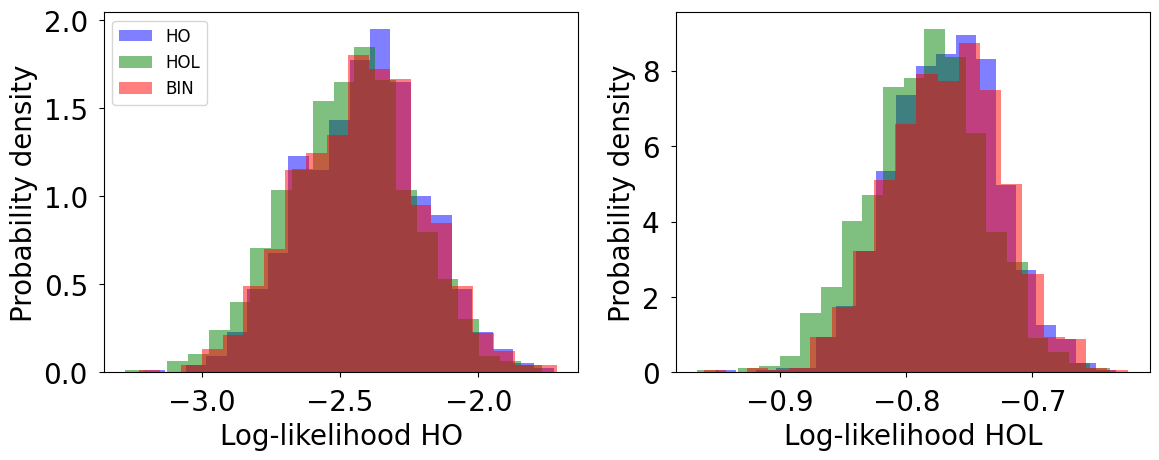

In [5]:

fig = plt.figure(figsize=(12, 5))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)






generate_hist (data_cl, ax1, 'like_ho')
# ax1.set_xscale('log')
compare_data (data_cl, 'like_ho')
ax1.set_ylabel('Probability density')
ax1.set_xlabel('Log-likelihood HO')

ax1.legend(loc='upper left', fontsize = 12)

generate_hist (data_cl, ax2, 'like_hol')
# ax2.set_xscale('log')
compare_data (data_cl, 'like_hol')
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Log-likelihood HOL')

fig.tight_layout()


## World Cup Data

In [6]:
filein_idx = '../Readfile/Data/wc_data_cprog_idx.txt'
filein_data = '../Readfile/Data/wc_data_cprog_game.txt'

T = 1000
ratio = 0.8
model = 1

data_wc = hist_at_given_sample_size_real_data (filein_idx, filein_data, model, ratio, T)

AVERAGE ITERATIONS: 20.302
STD_deviation: 1.3888110022605669


# like_ho
#P(HO <= BIN) =  0.385
#P(HO <= HOL) =  0.243
#P(HOL <= BIN) =  0.707



# like_hol
#P(HO <= BIN) =  0.333
#P(HO <= HOL) =  0.314
#P(HOL <= BIN) =  0.6





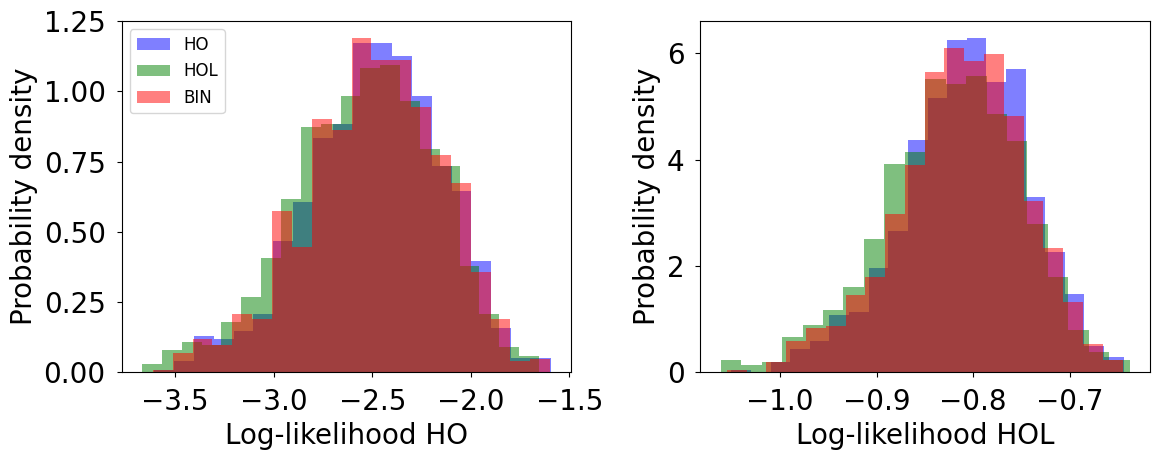

In [7]:
fig = plt.figure(figsize=(12, 5))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

generate_hist (data_wc, ax1, 'like_ho')
# ax1.set_xscale('log')
compare_data (data_wc, 'like_ho')
ax1.set_ylabel('Probability density')
ax1.set_xlabel('Log-likelihood HO')

ax1.legend(loc='upper left', fontsize = 12)

generate_hist (data_wc, ax2, 'like_hol')
# ax2.set_xscale('log')
compare_data (data_wc, 'like_hol')
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Log-likelihood HOL')

fig.tight_layout()

## Table of All Data

In [12]:
filein_idx = '../Readfile/Data/00009_idx.txt'
filein_data = '../Readfile/Data/00009_game.txt'



T = 1
ratio = 0.8
model = 1

data_cl = hist_at_given_sample_size_real_data (filein_idx, filein_data, model, ratio, T)

AVERAGE ITERATIONS: 10.0
STD_deviation: 0.0
